In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Define Models
## Activation Functions

In [121]:
class Sigmoid: 
    def __call__(self, x):
        return np.reciprocal(1 + np.exp(-x))
    
    def _x(self, x):
        return self(x) * (1 - self(x))
    
    def _xx(self, x):
        return self._x(x) * (1 - 2 * self(x))
    
    def _xxx(self, x):
        return self._xx(x) * (1 - 2 * self(x)) - 2 * self._x(x) ** 2
    
    def _xxxx(self, x):
        return self._xxx(x) * (1 - 2 * self(x)) - 6 * self._x(x) * self._xx(x)

class Tanh: 
    def __init__(self):
        self._g = Sigmoid()

    def __call__(self, x):
        return 2 * self._g(2 * x) - 1
    
    def _x(self, x):
        return 4 * self._g._x(2 * x)

    def _xx(self, x):
        return 8 * self._g._xx(2 * x)
    
    def _xxx(self, x):
        return 16 * self._g._xxx(2 * x)
    
    def _xxxx(self, x):
        return 32 * self._g._xxxx(2 * x)


## Neural Network

In [122]:
class MLP:
    def __init__(self, n=10, activation=Sigmoid) -> None:
        self.w = np.random.rand(4, n)
        self.a = activation()

    def __call__(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a(h)
        h = h @ self.w[3].reshape(-1, 1)
        return h
    
    def _x(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._x(h)
        h = h @ (self.w[3] * self.w[0]).reshape(-1, 1)
        return h

    def _y(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._x(h)
        h = h @ (self.w[3] * self.w[1]).reshape(-1, 1)
        return h

    def _xx(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[0]**2).reshape(-1, 1)
        return h

    def _yy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[1]**2).reshape(-1, 1)
        return h
    
    def _yxx(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xxx(h)
        h = h @ (self.w[3] * self.w[1] * self.w[0] ** 2).reshape(-1, 1)
        return h
    
    def _yyy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xxx(h)
        h = h @ (self.w[3] * self.w[1] ** 3).reshape(-1, 1)
        return h
    
    def _w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[3] * self.a._x(h)
        d0 = d2 * x
        d1 = d2 * y
        d3 = self.a(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _x_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0] * self.w[3] * self.a._xx(h)
        d0 = d2 * x + self.w[3] * self.a._x(h)
        d1 = d2 * y
        d3 = self.w[0] * self.a._x(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _y_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1] * self.w[3] * self.a._xx(h)
        d0 = d2 * x
        d1 = d2 * y + self.w[3] * self.a._x(h)
        d3 = self.w[1] * self.a._x(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _xx_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0]**2 * self.w[3] * self.a._xxx(h)
        d0 = d2 * x + 2 * self.w[0] * self.w[3] * self.a._xx(h)
        d1 = d2 * y
        d3 = self.w[0]**2 * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1]**2 * self.w[3] * self.a._xxx(h)
        d0 = d2 * x 
        d1 = d2 * y + 2 * self.w[1] * self.w[3] * self.a._xx(h)
        d3 = self.w[1]**2 * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yxx_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0]**2 * self.w[1] * self.w[3] * self.a._xxxx(h)
        d0 = d2 * x + 2 * self.w[0] * self.w[1] * self.w[3] * self.a._xxx(h)
        d1 = d2 * y + self.w[0]**2 * self.w[3] * self.a._xxx(h)
        d3 = self.w[0]**2 * self.w[1] * self.a._xxx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yyy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1]**3 * self.w[3] * self.a._xxxx(h)
        d0 = d2 * x
        d1 = d2 * y + 3 * self.w[1]**2 * self.w[3] * self.a._xxx(h)
        d3 = self.w[1]**3 * self.a._xxx(h)
        return np.stack([d0, d1, d2, d3], axis=1)

## Solution

In [123]:
class NeumannBC:
    def __call__(self, x):
        return 2 * np.sin(np.pi * x)
    
    def _xx(self, x):
        return - 2 * np.pi**2 * np.sin(np.pi * x)

class Solution:
    def __init__(self, N=MLP()):
        self.N = N
        self.g1 = NeumannBC()
    
    def __call__(self, x, y):
        return self.B(x, y) + x * (1-x) * y \
            * (self.N(x, y) - self.N(x, np.ones_like(x)) 
                            - self.N._y(x, np.ones_like(x)))
    
    def B(self, x, y):
        return y * (self.g1(x) - ((1 - x) * self.g1(0) + x * self.g1(1)))
    
    def _xx(self, x, y):
        return y * self.g1._xx(x) \
            - 2 * y * (self.N(x, y) - self.N(x, np.ones_like(x)) - self.N._y(x, np.ones_like(x))) \
            + x * (1 - x) * y * (self.N._xx(x, y) - self.N._xx(x, np.ones_like(x)) - self.N._yxx(x, np.ones_like(x)))

    def _yy(self, x, y):
        return x * (1 - x) * y * (self.N._yy(x, y) - self.N._yy(x, np.ones_like(x)) - self.N._yyy(x, np.ones_like(x)))
    
    def _xx_w(self, x, y):
        return - 2 * (self.N._w(x, y) - self.N._w(x, np.ones_like(x)) - self.N._y_w(x, np.ones_like(x))) \
            + np.expand_dims(x * (1 - x) * y, -1) * (self.N._xx_w(x, y) - self.N._xx_w(x, np.ones_like(x)) - self.N._yxx_w(x, np.ones_like(x)))

    def _yy_w(self, x, y):
        return np.expand_dims(x * (1 - x) * y, -1) * (self.N._yy_w(x, y) - self.N._yy_w(x, np.ones_like(x)) - self.N._yyy_w(x, np.ones_like(x)))

# Optimization

## Optimizers

In [124]:
class _Optimizer:
    def __init__(self, solution, alpha, silent=True):
        self.solution = solution
        self.alpha = alpha
        self.silent = silent

    @property
    def parameters(self):
        return self.solution.N.w


class SGD(_Optimizer):    
    def __call__(self, loss):
        f, g = loss(self.solution)
        self.parameters[...] = self.parameters - self.alpha * g
        if not self.silent: return f, g


class Nesterov(_Optimizer):
    def __init__(self, solution, alpha, silent=True):
        super().__init__(solution, alpha, silent)
        self.k = 0
        self.x = np.copy(self.parameters)
        
    def __call__(self, loss):
        f, g = loss(self.solution)
        x_ = self.parameters - self.alpha * g
        self.parameters[...] = (1 + self.mu) * x_ - self.mu * self.x
        self.x = x_
        if not self.silent: return f, g 

    @property
    def mu(self):
        return 1 - 3 / (5 + self.k)


class Adam(_Optimizer):
    def __init__(self, solution, alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-8, silent=True):
        super().__init__(solution, alpha, silent)
        self.beta_1, self.beta_2 = beta_1, beta_2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.k = 0
    
    def __call__(self, loss):
        self.k += 1
        f, g = loss(self.solution)
        self.m = self.beta_1 * self.m + (1-self.beta_1) * g
        self.v = self.beta_2 * self.v + (1-self.beta_2) * (g ** 2)
        m_hat = self.m / (1 - self.beta_1 ** self.k)
        v_hat = self.v / (1 - self.beta_2 ** self.k)
        self.parameters[...] = self.parameters - self.alpha * m_hat / (np.sqrt(v_hat) + self.epsilon)
        if not self.silent: return f, g

## PDE Loss

In [125]:
class PDELoss:
    def __init__(self, x, y):
        self.x, self.y = x, y
    
    def f(self, x, y):
        return (2 - np.power(np.pi * y, 2)) * np.sin(np.pi * x)

    def __call__(self, U: Solution, x=None, y=None):
        x = x if x else self.x
        y = y if y else self.y

        u_xx = U._xx(x, y)
        u_yy = U._yy(x, y)
        u_xx_w = U._xx_w(x, y)
        u_yy_w = U._yy_w(x, y)
        f = self.f(x, y)
        
        L = 0.5 * np.sum((u_xx + u_yy - f) ** 2)
        L_w = np.sum(np.expand_dims(u_xx + u_yy - f, -1) * (u_xx_w + u_yy_w), axis=0)
        return L, L_w

## Groundtruth

In [126]:
def exact_solution(x, y):
    return y ** 2 * np.sin(np.pi * x)

# Train

In [140]:
xx, yy = np.meshgrid(np.linspace(0, 1, 7), np.linspace(0, 1, 7))
xy = np.stack([xx, yy], axis=-1).reshape(-1, 2)
x, y = np.split(xy, 2, -1)

sol = Solution(MLP())
loss = PDELoss(x, y)
opt = Adam(sol, 1e-4, silent=False)

for i in range(50000):
    f, g = opt(loss)
    if i == 0 or (i+1) % 50 == 0: print('Epoch {}: loss = {}'.format(i, f))

Epoch 0: loss = 6620.771195590951
Epoch 49: loss = 6597.250458591878
Epoch 99: loss = 6572.883086456907
Epoch 149: loss = 6548.126168028706
Epoch 199: loss = 6522.97556617918
Epoch 249: loss = 6497.4285870841
Epoch 299: loss = 6471.483500971948
Epoch 349: loss = 6445.139415710251
Epoch 399: loss = 6418.396186732011
Epoch 449: loss = 6391.25434754932
Epoch 499: loss = 6363.715053415763
Epoch 549: loss = 6335.7800336866085
Epoch 599: loss = 6307.451550157057
Epoch 649: loss = 6278.732359699994
Epoch 699: loss = 6249.625680158512
Epoch 749: loss = 6220.135158836165
Epoch 799: loss = 6190.2648431645575
Epoch 849: loss = 6160.019153271714
Epoch 899: loss = 6129.402856261131
Epoch 949: loss = 6098.421042063102
Epoch 999: loss = 6067.079100750269
Epoch 1049: loss = 6035.382701227381
Epoch 1099: loss = 6003.337771215958
Epoch 1149: loss = 5970.950478461366
Epoch 1199: loss = 5938.227213094402
Epoch 1249: loss = 5905.174571083184
Epoch 1299: loss = 5871.799338714287
Epoch 1349: loss = 5838.1084

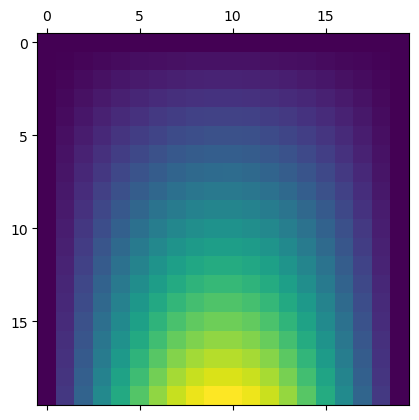

In [156]:
sol = Solution(MLP())
plt.matshow(sol(x, y).reshape(20, 20))

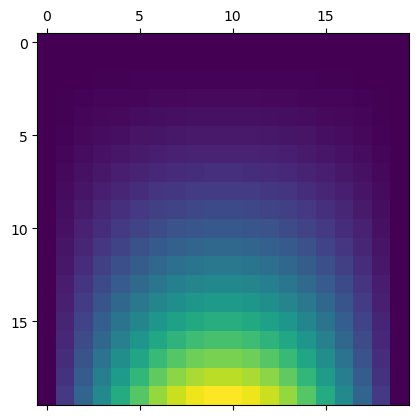

In [157]:
plt.matshow(exact_solution(x, y).reshape(20, 20))

C:\Users\geniu\AppData\Local\Temp\ipykernel_303376\2675359059.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.hist(((sol(x, y).reshape(7, 7) - exact_solution(x, y).reshape(7, 7)) / exact_solution(x, y).reshape(7, 7)).reshape(-1))


(array([ 6.,  0.,  0.,  0.,  8., 13.,  3.,  3.,  1.,  2.]),
 array([-1.        , -0.77553762, -0.55107523, -0.32661285, -0.10215047,
         0.12231192,  0.3467743 ,  0.57123668,  0.79569907,  1.02016145,
         1.24462383]),
 <BarContainer object of 10 artists>)

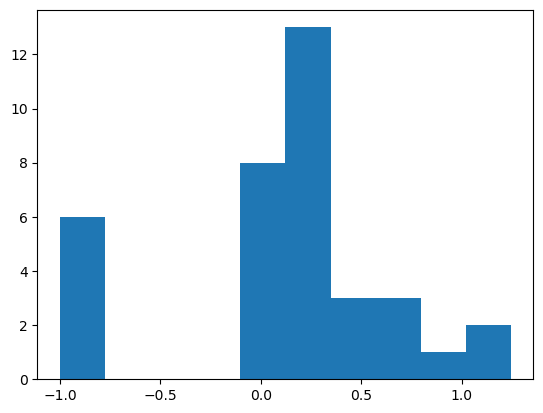

In [ ]:
plt.hist(((sol(x, y).reshape(7, 7) - exact_solution(x, y).reshape(7, 7)) / exact_solution(x, y).reshape(7, 7)).reshape(-1))